In [47]:
import numpy as np

x = np.linspace(0, 10, 100)
y = np.linspace(0, 10, 100)
rand = np.random.randn(*x.shape)
z = 2*x + 20*y# + rand

In [48]:
def model(x, y, w1, w2):
    return w1*x + w2*y

w1 = 5
w2 = 5
output = model(x, y, w1, w2)

In [49]:
def loss(x, y, z, w1, w2):
    return ((z-model(x, y, w1, w2))**2).mean()

error = loss(x, y, z, w1, w2)
error

4824.242424242424

In [4]:
import matplotlib.pyplot as plt

# Se crea la figura
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')

# Se crean los datos para representar\n",
N = 50
w1_min = 0
w1_max = 4
w2_min = 0
w2_max = 40
posibles_w1 = np.linspace(w1_min, w1_max, N)
posibles_w2 = np.linspace(w2_min, w2_max, N)
W1, W2 = np.meshgrid(posibles_w1, posibles_w2)
def LOSS(x, y, output, W1, W2):
    L = np.empty((len(W1), len(W1)))
    Z = np.empty((len(W1), len(W2), len(x)))

    for i in range(len(W1)):
        for j in range(len(W2)):
            L[i, j] = loss(x, y, z, W1[i, j], W2[i, j])
    return L
Z = LOSS(x, y, output, W1, W2)

# Se termina de configurar la figura
ax.plot_surface(W1, W2, Z)
# ax.scatter(w1, w2, error, color='red')
ax.set_xlabel('w1')
ax.set_ylabel('w2')
# ax.set_zlim(0, 1000)
ax.set_zlabel('loss')

ValueError: Unknown projection '3d'

<Figure size 720x720 with 0 Axes>

In [50]:
def gradiente_w1(z, x, y, w1, w2):
    return 2*((model(x, y, w1, w2)-z)*w1).mean()

def gradiente_w2(z, x, y, w1, w2):
    return 2*((model(x, y, w1, w2)-z)*w2).mean()

In [51]:
lr = 1e-4
steps = 500
w1 = 1
w2 = 10
output = model(x, y, w1, w2)
error = loss(x, y, z, w1, w2)
MAX_ERROR = 1e-5
i = 0

print(f"w1: {w1:.2f}, w2: {w2:.2f}, error: {error:.2f}")

while error>MAX_ERROR:
    dl_w1 = gradiente_w1(z, x, y, w1, w2)
    dl_w2 = gradiente_w2(z, x, y, w1, w2)

    w1 = w1 - lr*dl_w1
    w2 = w2 - lr*dl_w2
    error = loss(x, y, z, w1, w2)

    if (i+1)%10 == 0:
        print(f"i={i+1}: error={error}, w1={w1}, w2={w2}")
    
    i += 1

print(f"Se han necesitado {i+1} iteracciones")

w1: 1.00, w2: 10.00, error: 4053.70
i=10: error=3213.6668042774622, w1=1.1096219962092173, w2=11.096219962092176
i=20: error=2486.764941036171, w1=1.2167662970597852, w2=12.167662970597856
i=30: error=1879.696668717314, w1=1.3190458280221034, w2=13.190458280221039
i=40: error=1389.6634464835336, w1=1.4144974159140968, w2=14.144974159140977
i=50: error=1006.5122594586772, w1=1.501708437210105, w2=15.017084372101058
i=60: error=715.5640573404233, w1=1.5798559107678793, w2=15.798559107678804
i=70: error=500.3663781494498, w1=1.6486677160033503, w2=16.486677160033512
i=80: error=344.8543899193389, w1=1.7083299214880758, w2=17.083299214880764
i=90: error=234.72387681177779, w1=1.7593684137698833, w2=17.59368413769884
i=100: error=158.07321830815852, w1=1.8025290812114287, w2=18.025290812114296
i=110: error=105.50359155106518, w1=1.838672790731878, w2=18.386727907318797
i=120: error=69.89201272743745, w1=1.868693032119438, w2=18.686930321194403
i=130: error=46.01473665835131, w1=1.8934576014

In [52]:
x_mean = np.mean(x)
y_mean = np.mean(y)
x_std = np.std(x)
y_std = np.std(y)

In [53]:
x = (x - x_mean)/x_std
y = (y - y_mean)/y_std
z = 2*x + 20*y #+ rand

In [54]:
w1 = 1
w2 = 1
output = model(x, y, w1, w2)

In [55]:
error = loss(x, y, z, w1, w2)
error

399.99999999999983

Text(0.5, 0, 'loss')

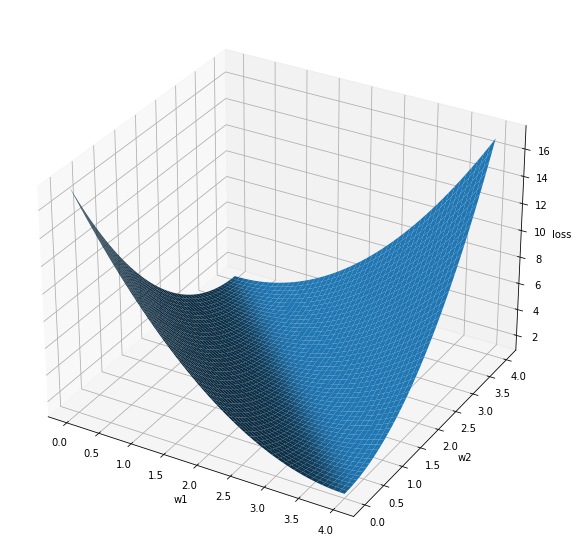

In [37]:
# Se crea la figura
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')

# Se crean los datos para representar\n",
N = 50
w1_min = 0
w1_max = 4
w2_min = 0
w2_max = 4
posibles_w1 = np.linspace(w1_min, w1_max, N)
posibles_w2 = np.linspace(w2_min, w2_max, N)
W1, W2 = np.meshgrid(posibles_w1, posibles_w2)
def LOSS(x, y, output, W1, W2):
    L = np.empty((len(W1), len(W1)))
    Z = np.empty((len(W1), len(W2), len(x)))

    for i in range(len(W1)):
        for j in range(len(W2)):
            L[i, j] = loss(x, y, z, W1[i, j], W2[i, j])
    return L
Z = LOSS(x, y, output, W1, W2)

# Se termina de configurar la figura
ax.plot_surface(W1, W2, Z)
# ax.scatter(w1, w2, error, color='red')
ax.set_xlabel('w1')
ax.set_ylabel('w2')
# ax.set_zlim(0, 1000)
ax.set_zlabel('loss')

In [56]:
# lr = 1e-4
w1 = 1
w2 = 10
output = model(x, y, w1, w2)
error = loss(x, y, z, w1, w2)
# MAX_ERROR = 1e-5
i = 0

print(f"w1: {w1:.2f}, w2: {w2:.2f}, error: {error:.2f}")

while error>MAX_ERROR:
    dl_w1 = gradiente_w1(z, x, y, w1, w2)
    dl_w2 = gradiente_w2(z, x, y, w1, w2)

    w1 = w1 - lr*dl_w1
    w2 = w2 - lr*dl_w2
    output = model(x, y, w1, w2)
    error = loss(x, y, z, w1, w2)

    if (i+1)%10 == 0:
        print(f"i={i+1}: error={error}, w1={w1}, w2={w2}")
    
    i += 1

print(f"Se han necesitado {i+1} iteracciones")

w1: 1.00, w2: 10.00, error: 121.00
i=10: error=121.0, w1=1.0, w2=10.0
i=20: error=121.0, w1=1.0, w2=10.0
i=30: error=121.0, w1=1.0, w2=10.0
i=40: error=121.0, w1=1.0, w2=10.0
i=50: error=121.0, w1=1.0, w2=10.0
i=60: error=121.0, w1=1.0, w2=10.0
i=70: error=121.0, w1=1.0, w2=10.0
i=80: error=121.0, w1=1.0, w2=10.0
i=90: error=121.0, w1=1.0, w2=10.0
i=100: error=121.0, w1=1.0, w2=10.0
i=110: error=121.0, w1=1.0, w2=10.0
i=120: error=121.0, w1=1.0, w2=10.0
i=130: error=121.0, w1=1.0, w2=10.0
i=140: error=121.0, w1=1.0, w2=10.0
i=150: error=121.0, w1=1.0, w2=10.0
i=160: error=121.0, w1=1.0, w2=10.0
i=170: error=121.0, w1=1.0, w2=10.0
i=180: error=121.0, w1=1.0, w2=10.0
i=190: error=121.0, w1=1.0, w2=10.0
i=200: error=121.0, w1=1.0, w2=10.0
i=210: error=121.0, w1=1.0, w2=10.0
i=220: error=121.0, w1=1.0, w2=10.0
i=230: error=121.0, w1=1.0, w2=10.0
i=240: error=121.0, w1=1.0, w2=10.0
i=250: error=121.0, w1=1.0, w2=10.0
i=260: error=121.0, w1=1.0, w2=10.0
i=270: error=121.0, w1=1.0, w2=10.0
i=

KeyboardInterrupt: 